## Level - B

#### Problem Statement :Consumer complaints analysis 

* Use clustering techniques to group these text items into clusters. 
* Assign meaningful names to these clusters. E.g. Malfunctions, Hidden Fees and Outages could be three potential types of clusters.
* You are free to design your clustering solution and enhance it with any text processing and techniques (e.g. word similarity)
* The number of clusters is also left up to you to decide.



#### About The Dataset

* This represents a list of complaints made by users of the services provided by a US-based telecom company

#### Import Libraries

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [72]:
data = pd.read_csv("D:\\Assignment\\Dataset\\comcast_consumeraffairs_complaints.csv")
data.head()

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     5659 non-null   object
 1   posted_on  5659 non-null   object
 2   rating     5659 non-null   int64 
 3   text       5629 non-null   object
dtypes: int64(1), object(3)
memory usage: 177.0+ KB


### Missing Values

In [74]:
missing_value= data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
data_types = data.dtypes
missing_values_table = pd.concat([missing_value, percentage, data_types], axis=1)
miss_val = missing_values_table.rename(columns = {0 : 'Missing Values',1 : 'Percentage',2: 'Data Types'})
miss_val.style.background_gradient(cmap = "plasma")

,Missing Values,Percentage,Data Types
author,0,0.000000,object
posted_on,0,0.000000,object
rating,0,0.000000,int64
text,30,0.530129,object


In [75]:
data[data['text'].isnull()]

,author,posted_on,rating,text
1321,"Emmy of Santa Clara, CA","Aug. 25, 2007",0,NaN
1322,"John of Jacksonville, FL","Aug. 24, 2007",0,NaN
1323,"Karyn of Kenilworth, NJ","Aug. 21, 2007",0,NaN
1325,"W of Morton Grove, IL","March 6, 2007",0,NaN
1326,"Dennis of Sewell, NJ","March 1, 2007",0,NaN
1327,"Wesley of Pittsburgh, PA","Feb. 28, 2007",0,NaN
1328,"Cynthia of Poca, WV","Feb. 18, 2007",0,NaN
1329,"Jeff of Huntington, WV","Feb. 15, 2007",0,NaN
1330,"Tim of Kane, PA","Feb. 9, 2007",0,NaN
1331,"Anthony of Ogden, UT","Feb. 4, 2007",0,NaN


In [76]:
data.dropna(inplace=True)

The Missing Values of the State The Column To Drop The Values On The Datafame To Handle The NAN Values

### EDA

In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,5629.0,0.826435,0.669073,0.0,0.0,1.0,1.0,5.0


### Year

In [78]:
data['posted_on'] = pd.to_datetime(data['posted_on'])

In [79]:
data['author'][0][1]

'l'

In [80]:
data['author']=data['author'].str.split(',')

In [81]:
try:
    for i in range(len(data['author'])):
        data.loc[i,'State'] = data['author'][i][1]
except IndexError:
    data.loc[i,'State'] = 'Na'

In [82]:
len(data['author'])

5629

In [83]:
data['rating'].value_counts()

1    3734
0    1530
2     260
3      54
5      32
4      19
Name: rating, dtype: int64

In [84]:
data['Month'] = data['posted_on'].dt.month

In [85]:
data['year'] = data['posted_on'].dt.year

In [86]:
i=data['year'].value_counts().index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2014'),
  Text(3, 0, '2009'),
  Text(4, 0, '2008'),
  Text(5, 0, '2012'),
  Text(6, 0, '2010'),
  Text(7, 0, '2011'),
  Text(8, 0, '2013'),
  Text(9, 0, '2007'),
  Text(10, 0, '2006'),
  Text(11, 0, '2004'),
  Text(12, 0, '2003'),
  Text(13, 0, '2001'),
  Text(14, 0, '2002'),
  Text(15, 0, '2000')])

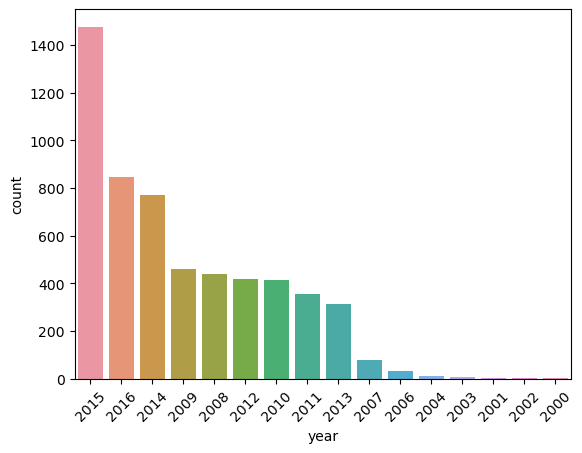

In [87]:
sns.countplot(data=data,x='year',order=i)
plt.xticks(rotation=45)

The Year that was Complaints is depicted in this graph. A majority of text are quite small and just a handful of them come near to the Highest Complaints on the 2015.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

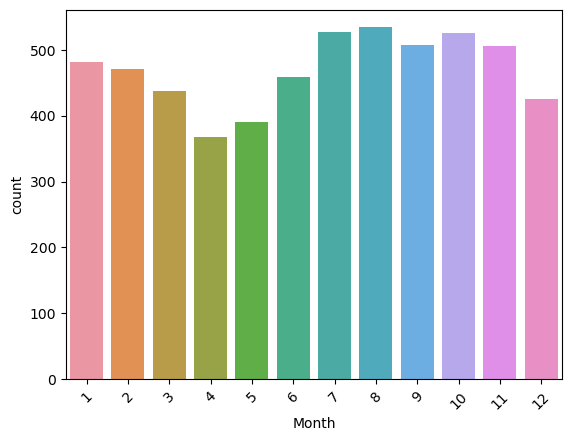

In [88]:
sns.countplot(data=data,x='Month')
plt.xticks(rotation=45)

In [89]:
year2015 = data.loc[data['year']==2015]

In [90]:
year2015=year2015.reset_index()

In [91]:
mo = year2015['Month'].value_counts()

In [92]:
month = mo.index

In [93]:
cnt = mo.values

Text(0, 0.5, 'Count')

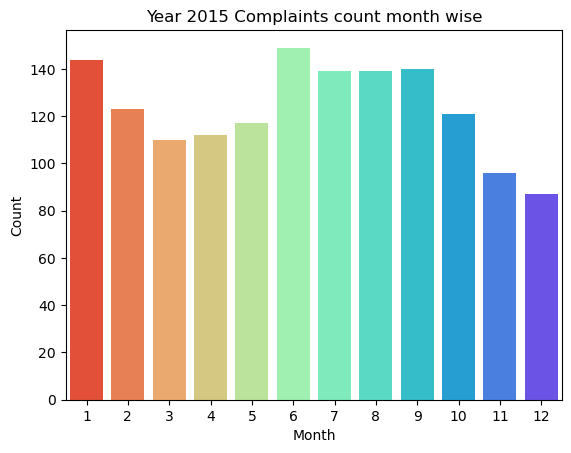

In [94]:
sns.barplot(data=year2015,x=month,y=cnt,palette='rainbow_r')
plt.title('Year 2015 Complaints count month wise')
plt.xlabel("Month")
plt.ylabel('Count')

The Year that was Complaints is portrayed in this graph. A majority of text are quite small and just a handful of them come near to the Highest Complaints on the Equal monthe on the modelling on the based on the lowest on the year 4 and highest year 6 to the raise on the complaints

In [95]:
try:
    for i in range(len(year2015['author'])):
        year2015.loc[i,'Sta'] = year2015['author'][i][1] 
except IndexError:
    year2015.loc[i,'Sta'] = 'Na'

In [96]:
year2015.isna().sum()

index           0
author          0
posted_on       0
rating          0
text            0
State        1087
Month           0
year            0
Sta           959
dtype: int64

In [97]:
year2015.dropna(inplace=True)
print(f'Null values present in the "year2015":\n{year2015.isna().sum()}')

Null values present in the "year2015":
index        0
author       0
posted_on    0
rating       0
text         0
State        0
Month        0
year         0
Sta          0
dtype: int64


#### Rating

Text(0, 0.5, 'author')

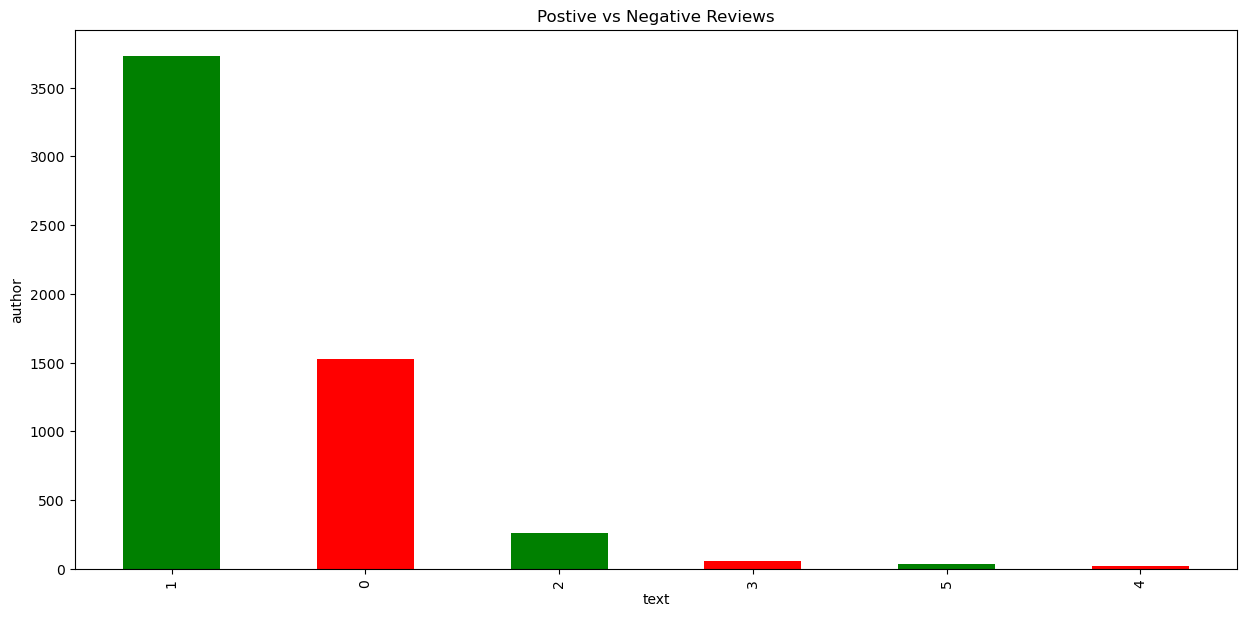

In [98]:
plt.figure(figsize = (15,7))
data['rating'].value_counts().plot(kind = 'bar', color = ['green','red'])
plt.title("Postive vs Negative Reviews")
plt.xlabel('text')
plt.ylabel('author')

The Complainents on the rating from on the highest based on the rating

###  Text Preprocessing

In [99]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [100]:
#Creating a User Defined Function for Text Preprocessing.
def nlp_process(text, stemm =False, lemm = True, Stop_words = False):
    
    #remove numbers and punctuations and lower case
    text = re.sub(r'[^\w\s]','',str(text).lower().strip())
    word_tokens = text.split()
    
    #stopwords
    if Stop_words == True:
        lst_text = [word for word in word_tokens if word not in stopwords]
        
        #stemming
        if stemm == True:
            stemmer = nltk.stem.porter.PorterStemmer()
            lst_text = [stemmer.stem(word) for word in lst_text]
            
            #lemmatization
            if lemm == True:
                lemmer = nltk.stem.wordnet.WordNetLemmatizer()
    

In [101]:
def lemma_stem(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemma_stem(token))

    return result

In [102]:
data['text'] = data['text'].apply(lambda x: x.replace('\n', ' ').strip())

Removing new lines to reduce the total space

### Punctuation Removal

In [103]:
data['text'] = data['text'].apply(lambda x :re.sub(r'[^\w\s]','',x))

### LowerCase

In [104]:
data['text'] = data['text'].str.lower()

### Tokenization

In [105]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Manic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Manic\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Manic\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

### Stop word Removel

In [106]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

In [107]:
data.head(5)

,author,posted_on,rating,text,State,Month,year
0,"[Alantae of Chesterfeild, MI]",2016-11-22,1,i used to love comcast until all these constan...,MI,11,2016
1,"[Vera of Philadelphia, PA]",2016-11-19,1,im so over comcast the worst internet provider...,PA,11,2016
2,"[Sarah of Rancho Cordova, CA]",2016-11-17,1,if i could give them a negative star or no sta...,CA,11,2016
3,"[Dennis of Manchester, NH]",2016-11-16,1,ive had the worst experiences so far since ins...,NH,11,2016
4,"[Ryan of Bellevue, WA]",2016-11-14,1,check your contract when you sign up for comca...,WA,11,2016


In [108]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    return lemm_text

### K - Means  Algorithem

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tokenize(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [stemmer.stem(token) for token in tokens if token not in stopwords]
    return tokens

#### Vectorize the Data

* Now that the training data has been loaded, we'll train the vectorizers to turn our features into numbers.

* Train the vectorizers
 Create the count vectorizer cVec using the CountVectorizer function

* Configure cVec to use the tokenizer function from earlier

* Perform fit_transform on cVec to train the vectorizer with the training Text
a. Save the result as count_X

* Create the TF-IDF vectorizer tVec using the TfidfVectorizer function

* Configure tVec to use the tokenizer function from earlier

* Perform fit_transform on tVec to train the vectorizer with the training Compliants
a. Save the result as tfidf_X

In [110]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize, max_df=0.8, max_features=2000, use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

In [111]:
print (tfidf_matrix)

  (0, 1984)	0.14585296975079648
  (0, 840)	0.06617390444482
  (0, 1342)	0.15152922855643103
  (0, 1977)	0.21910816204172776
  (0, 1742)	0.1314126996575067
  (0, 1783)	0.1323541606938276
  (0, 1801)	0.1989104618294436
  (0, 946)	0.11337708881029826
  (0, 1439)	0.14594771950645383
  (0, 47)	0.14240611574986317
  (0, 209)	0.12827849862819715
  (0, 1151)	0.3724136804086541
  (0, 1653)	0.2658040698119933
  (0, 1959)	0.18119430541132947
  (0, 655)	0.15098913482024195
  (0, 1341)	0.15588519611053644
  (0, 574)	0.16837921346627752
  (0, 1968)	0.08658521885814273
  (0, 692)	0.09468849640423375
  (0, 626)	0.1956202160221665
  (0, 425)	0.13010428395784662
  (0, 549)	0.0816932962328085
  (0, 1654)	0.3704069784114744
  (0, 1211)	0.16937644586245143
  (0, 1090)	0.16446758022488567
  :	:
  (5628, 1313)	0.04995629943164098
  (5628, 1298)	0.07172318785092609
  (5628, 1989)	0.04179172463320564
  (5628, 926)	0.10685560906387342
  (5628, 593)	0.09741936954732557
  (5628, 1684)	0.1084921260519178
  (5628, 

In [112]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(n_clusters=5)

In [113]:
data['text'] = km.labels_

In [114]:
print("Top words per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print()

Top words per cluster:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cluster 0:
 servic
 internet
 get
 custom
 time
 call
 problem
 cabl
 speed
 compani

Cluster 1:
 box
 channel
 cabl
 tv
 servic
 get
 call
 hd
 pay
 would

Cluster 2:
 account
 servic
 call
 bill
 payment
 credit
 told
 would
 collect
 equip

Cluster 3:
 bill
 month
 servic
 charg
 call
 told
 pay
 fee
 would
 custom

Cluster 4:
 call
 servic
 day
 tech
 would
 told
 appoint
 phone
 time
 said



### Infernce

* Utilizing the methodologies for the five types of clustering and giving these clusters names with meaning
*  The various types of clusters that can be divided into word groups, preprocessing methods, and text summaries created from meaningful keywords for word similarity cosine similarity
* The word to vectorize the characters on the features to summarise, and the vectorizers' training Use the CountVectorizer function to create the count vectorizer cVec.
* Using the model to train on the grouping cluster finelay the cluster to the nearest one.


### Development for Next level

The customer complains based on the reviews and to different parts of the collection based on building artificial text summarization on the subsequent level.

### Level - C

* Create an algorithm to read this data from a file and create a title (two to four words) for the complaint. 

* Function should take text file data as input
* Function should generate titles for each line in "text" column. 
* Function should attach this title to the line, separated by a comma
* Function should create a csv file containing text and titles separated by a comma
* Title should be meaningful and effectively summarize the complaint


In [115]:
import pandas as pd
import csv
df = pd.read_csv('D:\Assignment\Dataset\comcast_consumeraffairs_complaints.csv')

In [116]:
def generate_titles(df, text):
    lines_with_titles = []
    for text in df[text]:
        title = text.upper() 
        line_with_title = text + ", " + title 
        lines_with_titles.append(line_with_title)
    df['line_with_title'] = lines_with_titles
    return df

In [117]:
keyword_titles = {
    "I used to love Comcast. Until all these constant updates. My internet and cable crash a lot at night, and sometimes during the day, some channels don't even work and on demand sometimes don't play either. I wish they will do something about it. Because just a few mins ago, the internet have crashed for about 20 mins for no reason. I'm tired of it and thinking about switching to Wow or something. Please do not get Xfinity."
    "Thank God. I am changing to Dish. They gave me awesome pricing and super people to deal with. You can actually understand what they are saying. I'm so excited to finally be able to return this equipment although still haven't received the home security yet as promised 4 times. Go to h*ll Comcast. You have made me miserable and cause me to miss many hours of work with your promises."
    "I Have been a long time customer and only have Xfinity as my ISP for a while now. While I was in the local Walmart on November 4, 2016, there were customer representatives from Xfinity running promotions for and in the Salt Lake City area. Spoke with a representative and was able to get and signed a contract for Pro Blast at $50.00 a month with no contract or early termination fees. I received an email from Xfinity stating the changes that would be made to my account. It stated that not only would it be under contract for 24 months but there would be early termination fees. This is not what I had originally signed up for and it specifically states this on the contract that I signed. Contacted Xfinity customer service and was told since they cannot see the contract over the phone that I would need to go to Xfinity store in person. Went to Xfinity store on November 8, 2016 and was told that it would be under contract and there was no way around it. Because of this I have cancelled the upgrade and went back to my original plan. It's plain and simple. When a contract is signed it should be honored for what is stated on it. Xfinity is dishonest and not trustworthy. Therefore I will be looking and changing my ISP as soon as possible to another company. Xfinity does not deserve a paycheck from me or anyone else that I know."
}

* There are algorithms that are automatically generated based on user compliance with the text summarised by the algorithm.
* take text file data as input after reading the dataset.
* the next step text column have been input into the file and generated on the titles.
* The next stage is to automaically summarise the text column after the dataset 
* finely summarising the text and converting it to a csv file with the output as the frameworks

##### Future work 
* I'll give it a go once the model has been deployed in the user interface based on the model's auto generalisation of the commands for text conversion.

#### Thankyou